In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_classification

In [2]:
X,y=make_classification(n_samples=2000, n_features=20,n_classes=2,weights=[1,1],random_state=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [3]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

####               Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print("RF train roc-auc: {}".format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print("RF test roc-auc: {}".format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9836166666666666


   #### Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
ytrain_pred = lr.predict_proba(X_train)
print("LR train roc-auc: {}".format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = lr.predict_proba(X_test)
print("LR test roc-auc: {}".format(roc_auc_score(y_test,ytest_pred[:,1])))


LR train roc-auc: 0.9863568922694498
LR test roc-auc: 0.9885777777777777


#### Adaboost Classifier

In [6]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train,y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print("ada_classifier train roc-auc: {}".format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print("ada_classifier test roc-auc: {}".format(roc_auc_score(y_test,ytest_pred[:,1])))

ada_classifier train roc-auc: 0.9975081174960356
ada_classifier test roc-auc: 0.9826111111111111


#### KNN Classifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print("knn_classifier train roc-auc: {}".format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print("knn_classifier test roc-auc: {}".format(roc_auc_score(y_test,ytest_pred[:,1])))

knn_classifier train roc-auc: 0.981670071491109
knn_classifier test roc-auc: 0.9426111111111111


#### Now we focus on selecting the best threshold for maximum accuracy

In [8]:
pred=[]
for model in [rf_model,lr,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print("Ensemble test roc-auc: {}".format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9850333333333333


In [9]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.95,0.966929,0.538202,0.8
3,0.88,0.761539,0.509875,0.8
4,0.52,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.04,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.02,0.001147,0.441720,0.2


In [10]:
final_prediction

0      0.885262
1      0.118323
2      0.813783
3      0.737853
4      0.547447
         ...   
595    0.123840
596    0.120345
597    0.876697
598    0.165717
599    0.834857
Length: 600, dtype: float64

#### creating the thresholds and accuracy for all four combined models

In [11]:
#Combined thresholds for all the four model
fpr,tpr,thresholds=roc_curve(y_test,final_prediction)
thresholds

array([1.9134413 , 0.9134413 , 0.90873256, 0.90827475, 0.79993823,
       0.7980558 , 0.77390513, 0.77321156, 0.76847738, 0.76787124,
       0.74723392, 0.74637362, 0.71525211, 0.71393711, 0.65537883,
       0.65493537, 0.60656376, 0.58925354, 0.56827749, 0.56486186,
       0.54744674, 0.54139283, 0.52865858, 0.50627948, 0.49669266,
       0.48366892, 0.4471034 , 0.39405357, 0.38879719, 0.34636723,
       0.34336612, 0.23904122, 0.23890421, 0.23457968, 0.23396893,
       0.21245158, 0.20598417, 0.12312642, 0.1228351 , 0.10498954])

In [12]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds','accuracy']
accuracy_ls.sort_values(by='accuracy',ascending=False,inplace=True)
accuracy_ls

,thresholds,accuracy
26,0.447103,0.961667
21,0.541393,0.961667
20,0.547447,0.960000
25,0.483669,0.960000
23,0.506279,0.960000
22,0.528659,0.960000
24,0.496693,0.958333
19,0.564862,0.953333
27,0.394054,0.951667
18,0.568277,0.951667


#### Plotting the ROc Curve

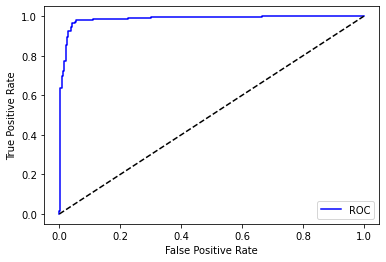

In [13]:
plt.plot(fpr,tpr, color='b',label='ROC')
plt.plot([0,1],[0,1],linestyle='--',color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### Result
From the experimentation above, it is observed that the threshold of 0.447103 at 96.2% accuracy is the best threshold for our classification.